In [1]:
import joblib
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
Load the data
train_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
X_test= pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
sample_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')

In [3]:
#What is the shape of train.csv data?
train_data.shape

(20000, 22)

20000 Rows and 22 Columns

**Columns information:**

1. Location: Location of the incident.

2. Cross_Street: Cross street near the incident.

3. Latitude: Latitude coordinate.

4. Longitude: Longitude coordinate.

5. Date_Reported: Date when the crime was reported.

6. Date_Occurred: Date when the crime occurred.

7. Time_Occurred: Time when the crime occurred.

8. Area_ID: ID of the area where the crime occurred.

9. Area_Name: Name of the area where the crime occurred.

10. Reporting_District_no: Reporting district number.

11. Part 1-2: Part classification of the crime (1 or 2).

12. Modus_Operandi: Method of operation used in the crime.

13. Victim_Age: Age of the victim.

14. Victim_Sex: Sex of the victim.

15. Victim_Descent: Descent of the victim.

16. Premise_Code: Code representing the type of premise where the crime occurred.

17. Premise_Description: Description of the premise.

18. Weapon_Used_Code: Code of the weapon used.

19. eapon_Description: Description of the weapon used.

20. Status: Status of the investigation.

21. Status_Description: Description of the status.

22. Crime_Category: Category of the crime (target variable).

In [4]:
#Were there any numerical columns in the dataset?
train_data.select_dtypes(include='number')

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,101.0,NaN
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,216.0,400.0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,501.0,NaN
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,101.0,NaN
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,401.0,400.0
...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,501.0,400.0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,301.0,NaN
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,102.0,NaN
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,501.0,NaN


Out of 22 Columns 9 are numerical and 13 are Object (Categorical)

In [5]:
#Were there any null values present?
train_data.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

Cross Street having 82.76% Data as NULL.
Weapon_Used_Code and Weapon_Description is having 63.325% EMPTY Data.

Modus Operandi is having 13.705% NULL values.
Victim_Sex and Victim_Descent having 13.12% missing data.

<Axes: title={'center': 'Latitude'}>

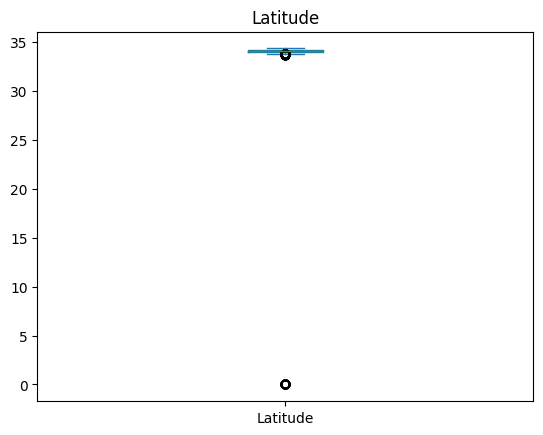

In [6]:
train_data['Latitude'].plot(kind="box", title="Latitude")

Distribution: The data appears to be heavily concentrated around the median value.
Median: The median latitude is approximately 33.

Range: The range of the data is approximately 35.
Outliers: There are two potential outliers at latitudes 0 and 35.

Spread: The data is relatively tightly clustered around the median, with a small interquartile range.

<Axes: title={'center': 'Longitude'}>

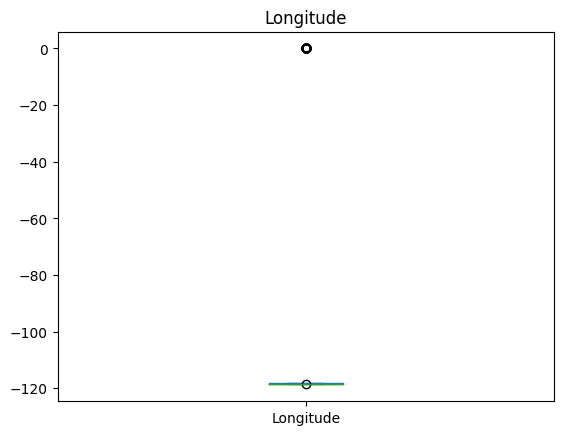

In [7]:
train_data['Longitude'].plot(kind="box", title="Longitude")

Data Range: The longitude values range from approximately -120 to 0.
Median: The median longitude is around -120.
Interquartile Range (IQR): The IQR, represented by the box, is very small, suggesting that the majority of data points are clustered very close to the median.

Outliers: There appears to be one outlier at a longitude of approximately 0.

<Axes: title={'center': 'Victim_Age'}>

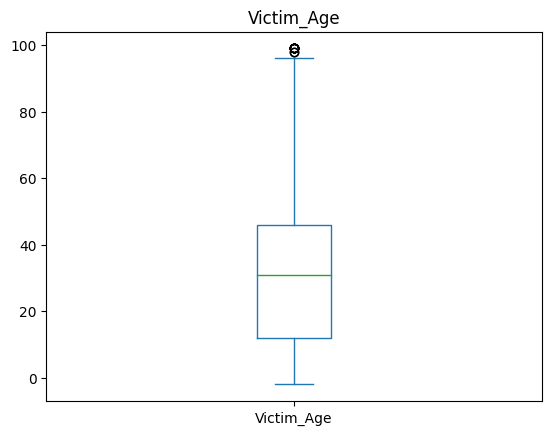

In [8]:
train_data['Victim_Age'].plot(kind="box", title="Victim_Age")

Median Age: The median victim age appears to be around 30 years old.

Distribution: The box, representing the interquartile range (IQR), is relatively short, suggesting that a significant portion of the victim ages are clustered within a narrow range around the median.

Range: The whiskers extending from the box show the minimum and maximum ages, which seem to be approximately 10 years old and 90 years old, respectively.

Outliers: There appears to be one outlier at the upper end, indicated by the isolated dots. This suggests that there are few victims whose age is significantly higher than the rest of the data.

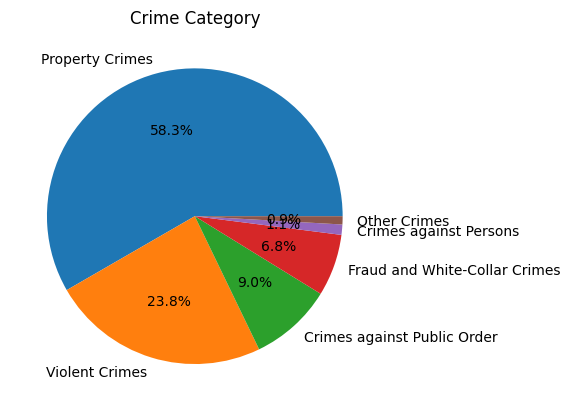

In [9]:
values = pd.Series(train_data['Crime_Category'])
v_counts = values.value_counts()
total = len(values)

fig = plt.figure()
plt.title("Crime Category")
plt.pie(v_counts, labels=v_counts.index, autopct='%1.1f%%');

58.3% of all crimes are 'Property Crimes' 


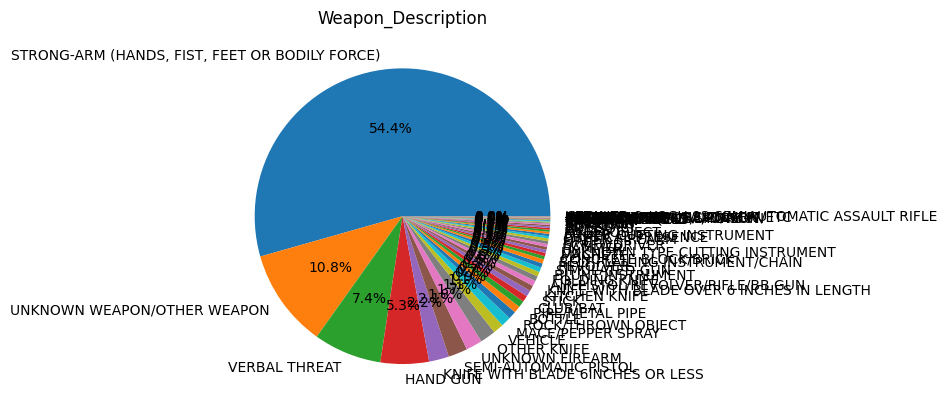

In [10]:
values = pd.Series(train_data['Weapon_Description'])
v_counts = values.value_counts()
total = len(values)

fig = plt.figure()
plt.title("Weapon_Description")
plt.pie(v_counts, labels=v_counts.index, autopct='%1.1f%%');

54.4% times STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) was used as Weapon.

In [11]:
max_crime_area = train_data['Area_ID'].value_counts().index[0]
df_new = train_data.iloc[np.where(train_data['Area_ID']==max_crime_area)] 
print(df_new['Area_Name'].iloc[0])

max_crime_weapon = train_data['Weapon_Used_Code'].value_counts().index[0]
df_new = train_data.iloc[np.where(train_data['Weapon_Used_Code']==max_crime_weapon)] 
print(df_new['Weapon_Description'].iloc[0])

77th Street
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)


#### Maximum crime occurs in  the area whose name is 77th Street
#### The most common used weapon is 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'

In [12]:
# Since Modus_Operandi(2741), Victim_Sex(2624) and Victim_Descent(2624) has computable imputation possible (13% missing values.)
# Therefore imputing it on the basis of Crime Category it belongs to will be helpul.

# grouped table contains most frequent values of Modus_Operandi, Victim_Sex and Victim_Descent corresponding to different crime cattegories.
grouped = train_data.groupby('Crime_Category')[['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']].agg(lambda x: x.value_counts().index[0])

# replacing missing values of Modus_Operandi, Victim_Sex and Victim_Descent with help of above table refrence.
for col in ['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']:
    train_data[col] = train_data.apply(lambda row: grouped.loc[row['Crime_Category'], col] if pd.isna(row[col]) else row[col], axis=1)
    
# Since we do not have Crime_Category column (target variable) for test data.
# So we impute it with most close method of above i.e. most frequent.
imputer = SimpleImputer(strategy='most_frequent')
X_test[['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']] = imputer.fit_transform(X_test[['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']])

In [13]:
train_data.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi               0
Victim_Age                   0
Victim_Sex                   0
Victim_Descent               0
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         20000 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             20000 non-null  object 
 14  Victim_Descent         20000 non-null  object 
 15  Pr

In [15]:
train_data.head(10)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
5,300 N AVENUE 57,NaN,34.1127,-118.1942,01/10/2020 12:00:00 AM,01/10/2020 12:00:00 AM,256.0,11.0,Northeast,1118.0,...,50.0,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,Violent Crimes
6,1600 N SOTO ST,NaN,34.0623,-118.1980,08/17/2020 12:00:00 AM,08/17/2020 12:00:00 AM,1840.0,4.0,Hollenbeck,448.0,...,0.0,X,X,202.0,LIQUOR STORE,NaN,NaN,IC,Invest Cont,Property Crimes
7,12600 BRADDOCK DR,NaN,33.9864,-118.4239,10/07/2021 12:00:00 AM,03/19/2020 12:00:00 AM,1100.0,14.0,Pacific,1455.0,...,68.0,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,Property Crimes
8,5500 COLDWATER CA AV,NaN,34.1781,-118.4179,01/28/2020 12:00:00 AM,01/26/2020 12:00:00 AM,1600.0,9.0,Van Nuys,939.0,...,0.0,M,H,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,Property Crimes
9,11500 AVIATION BL,NaN,33.9298,-118.3784,07/07/2020 12:00:00 AM,07/07/2020 12:00:00 AM,445.0,14.0,Pacific,1499.0,...,22.0,F,H,108.0,PARKING LOT,NaN,NaN,AA,Adult Arrest,Property Crimes


In [16]:
# imputer = SimpleImputer(strategy='most_frequent')
# train_data[['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']] = imputer.fit_transform(train_data[['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']])
# X_test[['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']] = imputer.transform(X_test[['Modus_Operandi', 'Victim_Sex', 'Victim_Descent']])

In [17]:
# Feature engineering and extraction

def Pre(data,c):

#================================================================================================================================================
#------------------Dealing with Modus Operandi Column--------------------------------------------------------------------------------------------    
    
    df_var = data.loc[:,['Modus_Operandi']]
    
    df_test = X_test.copy()
    df_test = df_test.loc[:,['Modus_Operandi']]
    
    df_var.fillna('None',inplace=True)
    df_test.fillna('None',inplace=True)

    def split_text(df):
        split_data = df['Modus_Operandi'].str.split(' ', expand=True)
        for i in range(split_data.shape[1]):
            df['Modus_Operandi_' + str(i+1)] = split_data.iloc[:, i]

        df.drop(labels='Modus_Operandi',axis=1,inplace=True)
        df.replace(['None',None], np.nan,inplace=True)
        return df

    df_var = split_text(df_var.copy())
    df_test = split_text(df_test.copy())
    
    modus_operandi_values_var = df_var.values.flatten()
    modus_operandi_values_test = df_test.values.flatten()

    modus_operandi_values = np.concatenate((modus_operandi_values_var, modus_operandi_values_test)) 

    if c==0:
        global le
        le = LabelEncoder()
        le = le.fit(modus_operandi_values)
        encoded_values = le.transform(modus_operandi_values_var)
    else:
        encoded_values = le.transform(modus_operandi_values_var)

    mapping_dict = {val: encoded_values[idx] for idx, val in enumerate(modus_operandi_values_var)}

    for col in df_var.columns:
        data[col] = df_var[col].map(mapping_dict)
        
        
#================================================================================================================================================
#--------------------Dealing with Date and Time Columns------------------------------------------------------------------------------------------

    date_format = '%m/%d/%Y %I:%M:%S %p'

    # Convert date columns to datetime format
    data['Date_Reported'] = pd.to_datetime(data['Date_Reported'], format=date_format)
    data['Date_Occurred'] = pd.to_datetime(data['Date_Occurred'], format=date_format)
    
    # Convert time column to proper format (assuming it's in HHMM format)
    data['Time_Occurred'] = data['Time_Occurred'].apply(lambda x: '{:04d}'.format(int(x)))
    data['Time_Occurred'] = pd.to_datetime(data['Time_Occurred'], format='%H%M').dt.hour
    
    #Helps ML in studying cyclicity of data by breaking it into periodic sine and cos cycles
    def encode(data, col, max_val):
        data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
        data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
        return data
    
    data['month_occurred'] = data.Date_Occurred.dt.month
    data = encode(data, 'month_occurred', 12)
    
    data['day_occurred'] = data.Date_Occurred.dt.day
    data = encode(data, 'day_occurred', 31)
    
    data['day_reported'] = data.Date_Reported.dt.day
    data = encode(data, 'day_reported', 31)
    
    data['day_week'] = data.Date_Occurred.dt.weekday
    
    data['day_of_year'] = data.Date_Occurred.dt.dayofyear
    
    data['difference'] = (data['Date_Reported'] - data['Date_Occurred']).dt.days

#================================================================================================================================================    
#-------------------Dealing with Weapon Used Code and Dropping Unneccesary Columns---------------------------------------------------------------    
    
    #To know which code to use for unknown/other weapon (Uncomment) but 500 code is not suitable
    #df = train_data.groupby(['Weapon_Used_Code','Weapon_Description','Crime_Category']).size().reset_index().rename(columns={0:'count'})
    #print(df.to_string())
    
    data.fillna({'Weapon_Used_Code': 0}, inplace=True)  
    data['Is_CrossStreet'] = data['Cross_Street'].apply(lambda x : 0 if x == 0 else 1)
    
    #Cross_Street has been dropped as only 17% values are not-null
    
#================================================================================================================================================
#--------------------------------Encoding--------------------------------------------------------------------------------------------------------

    #Were you able to convert all the text data to numerical data?
    
    victim_sex_2d = data['Victim_Sex'].values.reshape(-1, 1)
    status_2d = data['Status'].values.reshape(-1, 1)

    if c==0:
        global OneHotEncoder_sex_encoder
        global OneHotEncoder_status_encoder
        
        OneHotEncoder_sex_encoder = OneHotEncoder()
        OneHotEncoder_status_encoder = OneHotEncoder()
        OneHotEncoder_sex_encoder = OneHotEncoder_sex_encoder.fit(victim_sex_2d)
        victim_sex_encoded = OneHotEncoder_sex_encoder.transform(victim_sex_2d).toarray()
        OneHotEncoder_status_encoder = OneHotEncoder_status_encoder.fit(status_2d)
        status_encoded = OneHotEncoder_status_encoder.transform(status_2d).toarray()
    else:
        victim_sex_encoded = OneHotEncoder_sex_encoder.transform(victim_sex_2d).toarray()
        status_encoded = OneHotEncoder_status_encoder.transform(status_2d).toarray()
        

    victim_sex_columns = [f"Victim_Sex_{i}" for i in range(victim_sex_encoded.shape[1])]
    status_columns = [f"Status_{i}" for i in range(status_encoded.shape[1])]

    victim_sex_df = pd.DataFrame(victim_sex_encoded, columns=victim_sex_columns)
    status_df = pd.DataFrame(status_encoded, columns=status_columns)

    data = pd.concat([data, victim_sex_df, status_df], axis=1)
    data = data.drop(['Victim_Sex', 'Status'], axis=1)

    if c==0:
        global labelE_location
        global labelE_descent
        labelE_location = LabelEncoder()
        labelE_descent = LabelEncoder()
        data['Location'] = labelE_location.fit_transform(data['Location'])
        data['Victim_Descent'] = labelE_descent.fit_transform(data['Victim_Descent'])
    else:
        data['Location'] = data['Location'].map(lambda s: '<unknown>' if s not in labelE_location.classes_ else s)
        data['Victim_Descent'] = data['Victim_Descent'].map(lambda s: '<unknown>' if s not in labelE_descent.classes_ else s)
        labelE_location.classes_ = np.append(labelE_location.classes_, '<unknown>')
        labelE_descent.classes_ = np.append(labelE_descent.classes_, '<unknown>')
        data['Location'] = labelE_location.transform(data['Location'])
        data['Victim_Descent'] = labelE_descent.transform(data['Victim_Descent'])
    
#================================================================================================================================================
#---------------Dealing with Victim_Age,Latitude and Longitude Columns---------------------------------------------------------------------------
    
    if c==0:
        data['Victim_Age'] = data['Victim_Age'].apply(lambda x: 0 if x < 0 else x)
        geo_error = data[(data['Latitude'] == 0) & (data['Longitude']==0)].index
        data.drop(geo_error, inplace=True)

        Q1 = data['Latitude'].quantile(0.25)
        Q3 = data['Latitude'].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 +  1.5 * IQR
        data = data[(data['Latitude'] > lower_bound) & (data['Latitude'] < upper_bound)]

        Q1 = data['Longitude'].quantile(0.25)
        Q3 = data['Longitude'].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 +  1.5 * IQR
        data = data[(data['Longitude'] > lower_bound) & (data['Longitude'] < upper_bound)]

        Q1 = data['Victim_Age'].quantile(0.25)
        Q3 = data['Victim_Age'].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 +  1.5 * IQR
        data= data[(data['Victim_Age'] > lower_bound) & (data['Victim_Age'] < upper_bound)]
    
    
#================================================================================================================================================
#---------------Dealing with Part 1-2,Premise_Code and District_no Columns-----------------------------------------------------------    
    
   
    data['Part 1-2'] = data['Part 1-2'].astype(int)
    data['Part 1-2'] = data['Part 1-2'].apply(lambda x: 0 if x == 1 else 1)
    
    data['Premise_Code'] = data['Premise_Code'].apply(lambda x: int(x/100))
    
    data['district_number'] = data['Reporting_District_no'].astype(int)
    data['district_number'] = data['district_number'].apply(lambda x: str(x)[-2:])
    data['district_number'] = data['district_number'].astype(int)
    
    data = data.drop(['Reporting_District_no'], axis=1)  
    
    data = data.drop(['Weapon_Description', 'Premise_Description',
                      'Status_Description', 'Area_Name','Modus_Operandi',
                      'Date_Reported', 'Date_Occurred','Cross_Street'], axis=1)  
    
    #Did you applied any data scaling technique?
    
#     scaler = StandardScaler()
#     numerical_columns = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 
#                          'Reporting_District_no', 'Part 1-2', 'Victim_Age', 
#                          'Premise_Code', 'Weapon_Used_Code']

#     data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    return data

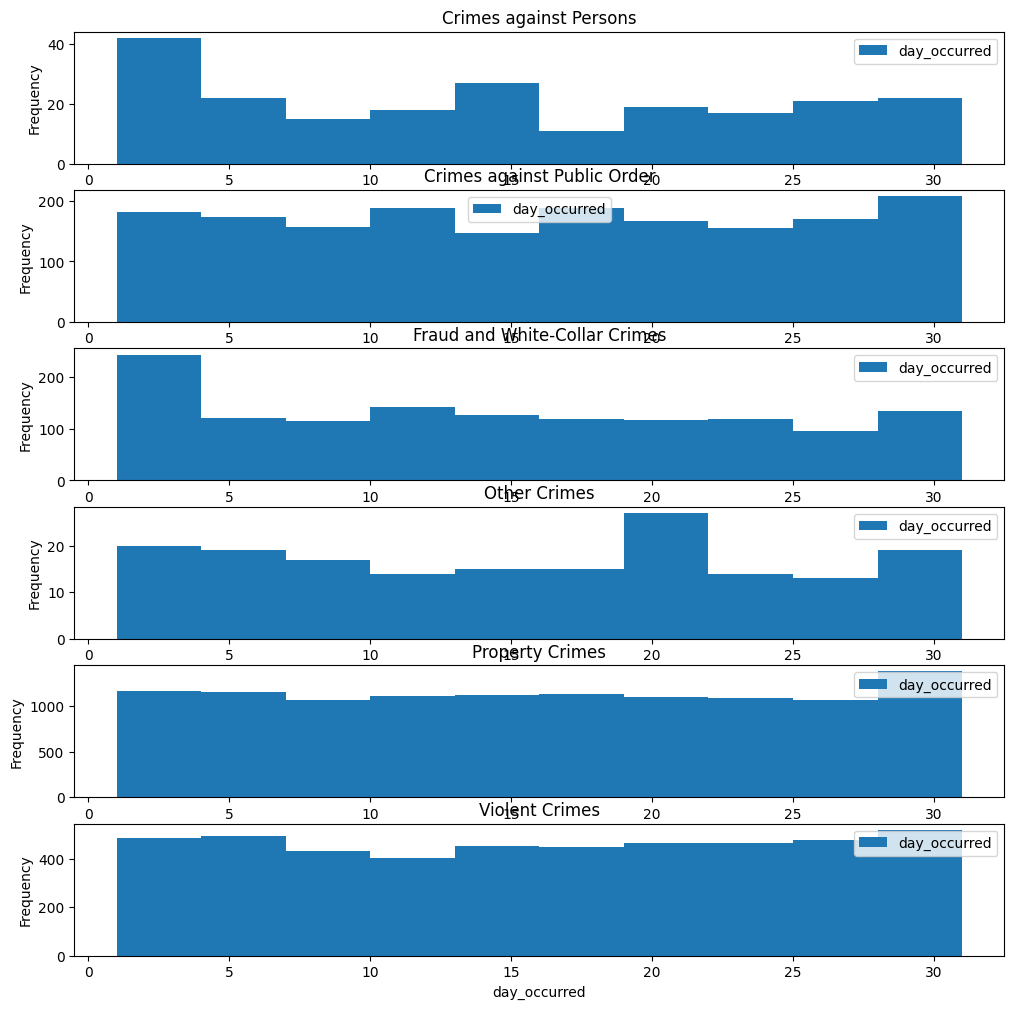

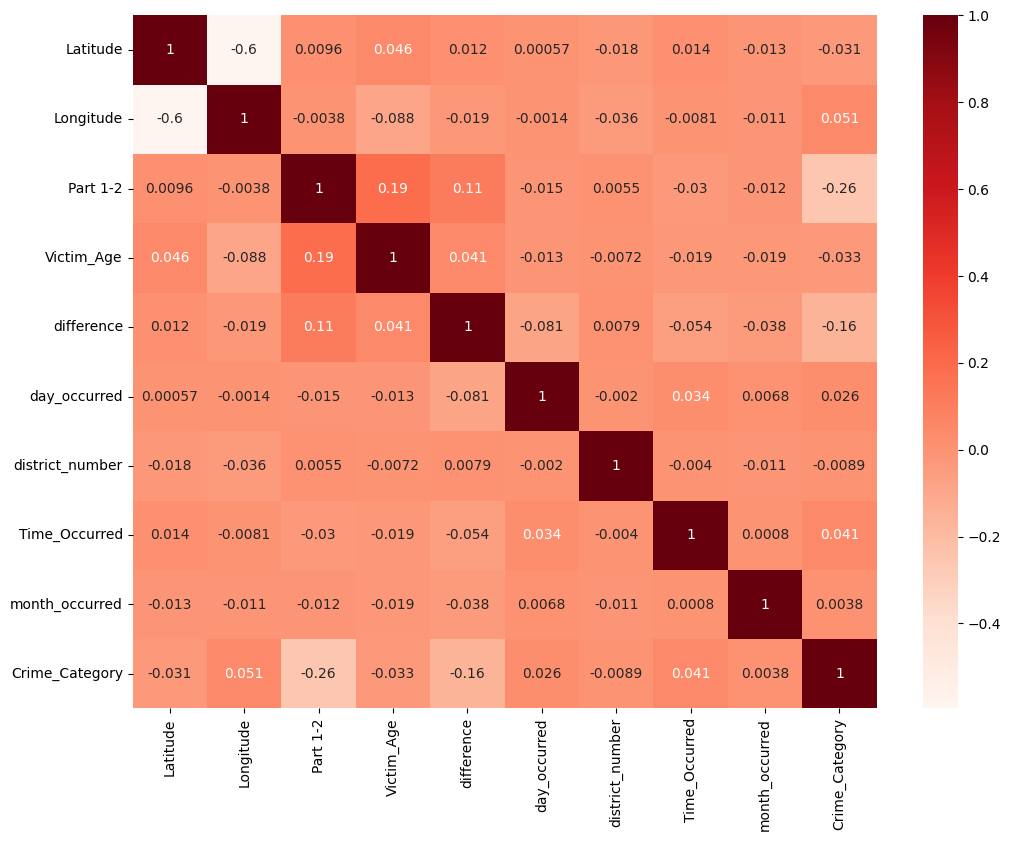

In [18]:
# Pre-processing training data
X = Pre(train_data,0)

X_Study = X[["difference","day_occurred","day_week",'Victim_Age','Time_Occurred','month_occurred','Crime_Category']]

ax = X_Study.plot.hist(column=["day_occurred"], by="Crime_Category", xlabel="day_occurred", figsize=(12, 12))

#Encoding Crime Category column in training dataset.
labelE_crime_category = LabelEncoder()
X['Crime_Category'] = labelE_crime_category.fit_transform(X['Crime_Category'])

# Storing the labelE_crime_category values in labelE_crime_category.pkl for decoding later.
joblib.dump(labelE_crime_category, 'labelE_crime_category.pkl')

X_Study = X[['Latitude', 'Longitude', 'Part 1-2','Victim_Age', 'difference', 
             'day_occurred','district_number', 'Time_Occurred','month_occurred','Crime_Category']]

X_corr = X_Study.corr()
#df2
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(X_corr,cmap = "Reds", annot=True)

# Seperating target variable from other variables
y = X["Crime_Category"].copy()
X = X.drop(columns=["Crime_Category"])

# Pre-processing test data
X_test = Pre(X_test,1)

### Most "Fraud and White Collar Crimes" and "Crimes Against Persons " occur in the first week of a month.
### "Property Crimes" and "Violent Crimes" are evenly distributed through the month.
### Most " Other Crimes" occur in the third week of the month.

#### More or less every feature is independent/not strongly (possitively or negatively) linearly correlated to the other features.

In [19]:
max_crime_weekday = X['day_week'].value_counts().index[0]
print(f'max_crime_weekday = {max_crime_weekday}')

max_crime_day = X['day_occurred'].value_counts().index[0]
print(f'max_crime_day = {max_crime_day}')
      
max_crime_premise = X['Premise_Code'].value_counts().index[0]
df_new = train_data.iloc[np.where(X['Premise_Code']==max_crime_premise)] 
print(df_new['Premise_Description'].iloc[0])
      
max_crime_descent = X['Victim_Descent'].value_counts().index[0]
print(f'max_crime_descent = {max_crime_descent}')

max_crime_age = X['Victim_Age'].value_counts().index[0]
print(f'max_crime_age = {max_crime_age}')

max_crime_hour = X['Time_Occurred'].value_counts().index[0]
print(f'max_crime_hour = {max_crime_hour}')
      
max_crime_month = X['month_occurred'].value_counts().index[0]
print(f'max_crime_month = {max_crime_month}')

max_crime_weekday = 4
max_crime_day = 1
STREET
max_crime_descent = 6
max_crime_age = 0.0
max_crime_hour = 12
max_crime_month = 1


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19447 entries, 0 to 19999
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            19447 non-null  int64  
 1   Latitude            19447 non-null  float64
 2   Longitude           19447 non-null  float64
 3   Time_Occurred       19447 non-null  int32  
 4   Area_ID             19447 non-null  float64
 5   Part 1-2            19447 non-null  int64  
 6   Victim_Age          19447 non-null  float64
 7   Victim_Descent      19447 non-null  int64  
 8   Premise_Code        19447 non-null  int64  
 9   Weapon_Used_Code    19447 non-null  float64
 10  Modus_Operandi_1    19447 non-null  int64  
 11  Modus_Operandi_2    19447 non-null  int64  
 12  Modus_Operandi_3    19447 non-null  int64  
 13  Modus_Operandi_4    19447 non-null  int64  
 14  Modus_Operandi_5    19447 non-null  int64  
 15  Modus_Operandi_6    19447 non-null  int64  
 16  Modus_Ope

In [21]:
X.isna().sum()

Location              0
Latitude              0
Longitude             0
Time_Occurred         0
Area_ID               0
Part 1-2              0
Victim_Age            0
Victim_Descent        0
Premise_Code          0
Weapon_Used_Code      0
Modus_Operandi_1      0
Modus_Operandi_2      0
Modus_Operandi_3      0
Modus_Operandi_4      0
Modus_Operandi_5      0
Modus_Operandi_6      0
Modus_Operandi_7      0
Modus_Operandi_8      0
Modus_Operandi_9      0
Modus_Operandi_10     0
month_occurred        0
month_occurred_sin    0
month_occurred_cos    0
day_occurred          0
day_occurred_sin      0
day_occurred_cos      0
day_reported          0
day_reported_sin      0
day_reported_cos      0
day_week              0
day_of_year           0
difference            0
Is_CrossStreet        0
Victim_Sex_0          0
Victim_Sex_1          0
Victim_Sex_2          0
Victim_Sex_3          0
Status_0              0
Status_1              0
Status_2              0
Status_3              0
Status_4        

In [22]:
X.head()

,Location,Latitude,Longitude,Time_Occurred,Area_ID,Part 1-2,Victim_Age,Victim_Descent,Premise_Code,Weapon_Used_Code,...,Victim_Sex_0,Victim_Sex_1,Victim_Sex_2,Victim_Sex_3,Status_0,Status_1,Status_2,Status_3,Status_4,district_number
0,7238,34.1522,-118.3910,18,15.0,0,75.0,14,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,63
1,7300,34.0028,-118.2391,13,13.0,0,41.0,6,2,400.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67
2,8525,34.0111,-118.2653,6,13.0,1,67.0,1,5,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,43
3,2879,34.2953,-118.4590,18,19.0,0,61.0,6,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,24
4,9584,33.9787,-118.2918,11,12.0,0,0.0,15,4,400.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,45


In [23]:
ct = ColumnTransformer([
        ('StandardScaler', StandardScaler(), ['Location','Latitude','Longitude','Victim_Age']),
        ('MinMaxScaler', MinMaxScaler(), ['Area_ID','Time_Occurred','district_number']),
        ('MaxAbsScaler', MaxAbsScaler(), ['Modus_Operandi_1', 'Modus_Operandi_2', 'Modus_Operandi_3', 'Modus_Operandi_4', 'Modus_Operandi_5', 'Modus_Operandi_6', 'Modus_Operandi_7', 'Modus_Operandi_8', 'Modus_Operandi_9', 'Modus_Operandi_10'])
    ], remainder='passthrough')

X = ct.fit_transform(X)
X_test = ct.transform(X_test)

X = pd.DataFrame(X, columns=ct.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=ct.get_feature_names_out())

X.head()

,StandardScaler__Location,StandardScaler__Latitude,StandardScaler__Longitude,StandardScaler__Victim_Age,MinMaxScaler__Area_ID,MinMaxScaler__Time_Occurred,MinMaxScaler__district_number,MaxAbsScaler__Modus_Operandi_1,MaxAbsScaler__Modus_Operandi_2,MaxAbsScaler__Modus_Operandi_3,...,remainder__Is_CrossStreet,remainder__Victim_Sex_0,remainder__Victim_Sex_1,remainder__Victim_Sex_2,remainder__Victim_Sex_3,remainder__Status_0,remainder__Status_1,remainder__Status_2,remainder__Status_3,remainder__Status_4
0,0.178173,0.691440,-0.334126,2.064120,0.70,0.782609,0.632653,0.202811,1.000000,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.195085,-0.768736,1.123809,0.501677,0.60,0.565217,0.673469,0.451807,0.140281,0.176353,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.529230,-0.687615,0.872342,1.696486,0.60,0.260870,0.428571,0.100402,0.545090,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.010840,2.090042,-0.986789,1.420761,0.90,0.782609,0.234694,0.100402,0.669339,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.818096,-1.004280,0.617995,-1.382444,0.55,0.478261,0.448980,0.261044,0.507014,0.833667,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
#Were you able to split the dataset in training and validation sets with train_test_split?

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  random_state=42, stratify=y)

In [25]:
X.isna().sum()

StandardScaler__Location           0
StandardScaler__Latitude           0
StandardScaler__Longitude          0
StandardScaler__Victim_Age         0
MinMaxScaler__Area_ID              0
MinMaxScaler__Time_Occurred        0
MinMaxScaler__district_number      0
MaxAbsScaler__Modus_Operandi_1     0
MaxAbsScaler__Modus_Operandi_2     0
MaxAbsScaler__Modus_Operandi_3     0
MaxAbsScaler__Modus_Operandi_4     0
MaxAbsScaler__Modus_Operandi_5     0
MaxAbsScaler__Modus_Operandi_6     0
MaxAbsScaler__Modus_Operandi_7     0
MaxAbsScaler__Modus_Operandi_8     0
MaxAbsScaler__Modus_Operandi_9     0
MaxAbsScaler__Modus_Operandi_10    0
remainder__Part 1-2                0
remainder__Victim_Descent          0
remainder__Premise_Code            0
remainder__Weapon_Used_Code        0
remainder__month_occurred          0
remainder__month_occurred_sin      0
remainder__month_occurred_cos      0
remainder__day_occurred            0
remainder__day_occurred_sin        0
remainder__day_occurred_cos        0
r

In [26]:
# XGBoost Fine Tuning
xgb_refined_params = {
    'n_estimators': [90, 100, 110],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [6, 7, 8],
    'min_child_weight': [4, 5, 6],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7]
}

grid_search_xgb_refined = RandomizedSearchCV(XGBClassifier(random_state=42), param_distributions=xgb_refined_params, cv=5, n_jobs=-1, verbose=3, random_state=42, n_iter=100)
grid_search_xgb_refined.fit(X_train, y_train)
best_xgb_refined_model = grid_search_xgb_refined.best_estimator_
print("Best hyperparameters:", grid_search_xgb_refined.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=90, subsample=0.9;, score=0.940 total time=   6.5s
[CV 3/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=110, subsample=0.9;, score=0.949 total time=   7.5s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=110, subsample=0.9;, score=0.941 total time=   7.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=6, n_estimators=110, subsample=1.0;, score=0.938 total time=   7.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.15, max_depth=6, min_child_weight=6, n_estimators=110, subsample=0.9;, score=0.940 total time=   5.9s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=110, subsample=0.9;, score=0.939 total time=   8.6s
[CV 3/5] END colsample_b

n_estimators

Purpose: Represents the number of trees in the ensemble.
Impact: Increasing this value generally improves performance but can lead to overfitting if too high.
learning_rate (also known as eta)

Purpose: Controls the contribution of each tree to the final prediction.
Impact: A lower learning rate requires more trees but can lead to a more robust model, while a higher learning rate can converge faster but might result in overfitting.
max_depth

Purpose: Defines the maximum depth of each tree.
Impact: A deeper tree can capture complex patterns but is prone to overfitting. A shallower tree is simpler but might underfit.
min_child_weight

Purpose: Minimum sum of instance weight (hessian) needed in a child node.
Impact: Controls overfitting. Higher values prevent the model from creating complex trees and improve generalization.
subsample

Purpose: Fraction of the training data used for each tree.
Impact: Randomly samples a subset of observations for each tree, reducing variance and preventing overfitting.
colsample_bytree

Purpose: Fraction of columns (features) used for each tree.
Impact: Randomly selects a subset of features for each tree, helping to prevent overfitting and improve generalization.

In [27]:
# KNN Fine Tuning
param_grid = {
    'n_neighbors': [4, 5, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters for KNN:", grid_search.best_params_)
best_knn_model = grid_search.best_estimator_

Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


n_neighbors

Purpose: Determines the number of neighbors considered for making predictions.
Impact: A larger n_neighbors can smooth out the decision boundary, making the model more robust to noise, but it can also make the model less sensitive to local patterns.
weights

Purpose: Controls the influence of neighbors on the prediction.
Options:
'uniform': All neighbors contribute equally.
'distance': The weight of each neighbor is inversely proportional to its distance from the query point.
Impact: 'distance' can be useful when data points have varying densities.
metric

Purpose: Defines the distance metric used to compute distances between data points.
Options:
'euclidean': Straight-line distance between points.
'manhattan': Sum of absolute differences between corresponding coordinates.

In [28]:
# # SVC Fine Tuning
# param_grid_svm = {
#     'C': [0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search_svm.fit(X_train, y_train)
# best_svm_model = grid_search_svm.best_estimator_

In [29]:
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform Grid Search Cross-Validation
# grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_dt_model = grid_search.best_estimator_

# print("Best Hyperparameters:", best_params)

In [30]:
# param_grid_bagging = {
#     'n_estimators': [10, 50, 100],
#     'max_samples': [0.5, 0.7, 1.0],
#     'max_features': [0.5, 0.7, 1.0],
#     'bootstrap': [True, False],
#     'bootstrap_features': [True, False]
# }

# bagging_model = BaggingClassifier(best_dt_model)

# grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid_bagging, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search_bagging.fit(X_train, y_train)

# best_bagging_model = grid_search_bagging.best_estimator_

# print("Best hyperparameters for Bagging:", grid_search_bagging.best_params_)

In [31]:
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive'],
# }

# # Create the MLP classifier
# grid_search = GridSearchCV(MLPClassifier(max_iter=100, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print("Best hyperparameters:", grid_search.best_params_)
# best_mlp_model = grid_search.best_estimator_

In [32]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    return accuracy

#============================================================================================

models = {
    'XGBoost Refined': best_xgb_refined_model,
    'KNN': best_knn_model,
    'Random Forest': RandomForestClassifier()
#     'Decision Tree': best_dt_model,
}

#============================================================================================
best_model = None
best_score = 0

for name, model in models.items():
    accuracy = evaluate_model(model, X_train, y_train, X_val, y_val)
    print(f"{name} Accuracy: {accuracy:.4f}")
    if accuracy > best_score:
        best_score = accuracy
        best_model = model

XGBoost Refined Accuracy: 0.9447
KNN Accuracy: 0.7735
Random Forest Accuracy: 0.9162


In [33]:
best_model.fit(X, y)
y_train_pred = best_model.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)}")

y_pred = best_model.predict(X_test)

Training Accuracy: 0.9878511281095327


In [34]:
labelE_crime_category = joblib.load('labelE_crime_category.pkl')
y_pred = labelE_crime_category.inverse_transform(y_pred)
y_pred

array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

In [35]:
len(y_pred)

5000

In [36]:
submission = pd.DataFrame({"ID": np.arange(1,5001), 
                           "Crime_Category": y_pred,
                          }
                         ) 

submission.to_csv('submission.csv',index=False)